<a href="https://colab.research.google.com/github/zzerross/ai/blob/main/rnn/sin/RNNSinRadians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers

mpl.rcParams['lines.markersize'] = 0.5
mpl.rcParams['lines.linewidth'] = 0.2
# mpl.rcParams['lines.linestyle'] = '-.'

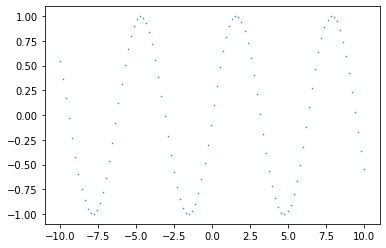

In [14]:
# pi/2 * 1 = 90
# pi/2 * 2 = 180
# pi/2 * 3 = 270
# pi/2 * 4 = 360
radians = np.linspace(-10, 10, 100)
data = np.sin(radians)
plt.scatter(radians, data)

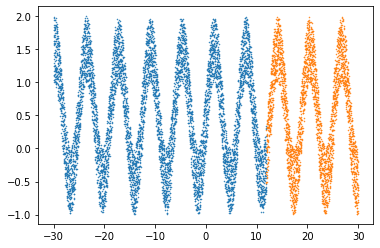

In [15]:
def get_input(start, end, num, timesteps):
  radians = np.linspace(start, end, num + timesteps)
  sin = np.sin(radians) + np.random.random(num + timesteps)
  return radians, sin

hidden_units = 32
timesteps = 20
input_dim = 1
output_dim = 1

data_n = 10000
data_x, data_y = get_input(-30, 30, data_n, timesteps)

train_n = int(data_n * 0.7)
test_n = int(data_n * 0.3)
train_x, train_y = data_x[:train_n], data_y[:train_n]
test_x, test_y = data_x[train_n:], data_y[train_n:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)

In [16]:
def make_sequence(input_x, input_y, timesteps):
  x = list(map(lambda x: input_x[x:x+timesteps], range(len(input_x) - timesteps)))
  y = input_y[timesteps-1:-1]
  return np.reshape(x, (-1, timesteps, input_dim)), np.reshape(y, (-1, input_dim))

def test_sequence(n=3):
  print(make_sequence([0, 1, 2, 3, 4, 5, 6], [10, 11, 12, 13, 14, 15, 16], n))
test_sequence()

train_seq_x, train_seq_y = make_sequence(train_x, train_y, timesteps)
test_seq_x, test_seq_y = make_sequence(test_x, test_y, timesteps)

(array([[[0],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]]]), array([[12],
       [13],
       [14],
       [15]]))


In [17]:
def make_model():
  model = models.Sequential()
  model.add(layers.SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))
  model.add(layers.Dense(output_dim))
  model.compile(loss='mse')
  model.summary()
  return model
model = make_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


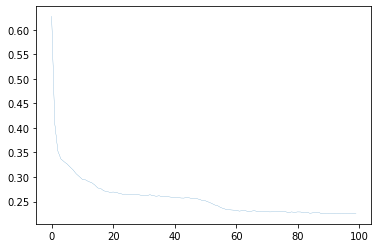

In [18]:
history = model.fit(train_seq_x, train_seq_y, epochs=100, verbose=0)
plt.plot(history.history['loss'])

In [19]:
test_loss = model.evaluate(test_seq_x, test_seq_y)

94/94 [==============================] - 0s 2ms/step - loss: 0.6372


(3000, 1) (3000, 1)


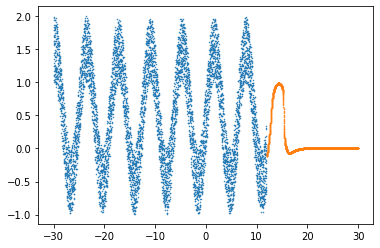

In [37]:
predicted_x = test_seq_x[:,-1]
predicted_y = model.predict(test_seq_x)
print(predicted_x.shape, predicted_y.shape)

plt.scatter(train_x, train_y)
plt.scatter(predicted_x, predicted_y)